In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [400]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importation des données

In [401]:
customers = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 6/DAN-P6-donnees/customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [402]:
transactions = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 6/DAN-P6-donnees/transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [403]:
products = pd.read_csv('/content/drive/MyDrive/Formation Openclassroom/Projet 6/DAN-P6-donnees/products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


# Nettoyage des tables

## Tables customers

Présence de 2 faux clients ct_0 et ct_1

Je les supprime de ma table :

In [404]:
customers.shape

(8623, 3)

In [405]:
customers.set_index('client_id',inplace = True)
customers.drop('ct_0', axis = 0,inplace=True)
customers.drop('ct_1', axis = 0,inplace=True)
customers = customers.reset_index()
customers.shape

(8621, 3)

J'ajoute les colonnes "Age" et "Tranche d'âge" afin de simplifier la lecture et les analyses

In [406]:
customers['Age'] = 2022 - customers['birth']
customers.head()

,client_id,sex,birth,Age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [407]:
customers["Tranche d'âge"] = "Na"
customers["Tranche d'âge"].loc[customers["Age"] <= 20 ] = 20
customers["Tranche d'âge"].loc[(customers["Age"]> 20) & (customers["Age"]<= 30)] = 30
customers["Tranche d'âge"].loc[(customers["Age"]> 30) & (customers["Age"]<= 40)] = 40
customers["Tranche d'âge"].loc[(customers["Age"]> 40) & (customers["Age"]<= 50)] = 50
customers["Tranche d'âge"].loc[(customers["Age"]> 50) & (customers["Age"]<= 60)] = 60
customers["Tranche d'âge"].loc[(customers["Age"]> 60) & (customers["Age"]<= 70)] = 70
customers["Tranche d'âge"].loc[(customers["Age"]> 70) & (customers["Age"]<= 80)] = 80
customers["Tranche d'âge"].loc[(customers["Age"]> 80) & (customers["Age"]<= 90)] = 90
customers["Tranche d'âge"].loc[(customers["Age"]> 90)] = 100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [408]:
customers.head()

,client_id,sex,birth,Age,Tranche d'âge
0,c_4410,f,1967,55,60
1,c_7839,f,1975,47,50
2,c_1699,f,1984,38,40
3,c_5961,f,1962,60,60
4,c_5320,m,1943,79,80


Je vérifie la présence de Na 

In [409]:
customers.isna().sum()

client_id        0
sex              0
birth            0
Age              0
Tranche d'âge    0
dtype: int64

Il n'y a pas de Na dans ma table

## Table transactions

### Traitement des doublons

Je commence par regarder combien ma table contient de doublons 

In [410]:
transactions.duplicated().sum()

126

Je cherche ensuite les identifiants du produit de ces doublons de transactions

In [411]:
transac_duplicate = transactions.loc[transactions.duplicated()== True]
pd.unique(transac_duplicate['id_prod'])

array(['T_0'], dtype=object)

In [412]:
transactions.loc[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Toutes mes transactions en doublons sont liées au produit T_0.

Ce produit T_0 a visiblement servi de test ▶ Je vais supprimer ce produit de mes tables products et transactions

In [413]:
transactions.shape

(679532, 4)

In [414]:
transactions.set_index('id_prod',inplace = True)
transactions.drop('T_0', axis = 0,inplace=True)
transactions = transactions.reset_index()
transactions.shape

(679332, 4)

J'ai bien supprimé mes 200 "fausses" transactions



### Traitement de la date

Pour pouvoir analyser les ventes selon leur date, j'ai besoin d'isoler le jour de chaque vente en ne prenant pas en compte l'heure

In [415]:
transactions[['day','hour']] = transactions.date.str.split(expand=True)
transactions.head()

,id_prod,date,session_id,client_id,day,hour
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,13:21:29.043970
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,07:55:19.149409
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,15:44:33.155329
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,04:19:29.835891
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,08:22:08.194479


In [416]:
transactions['date'] = transactions['date'].astype('datetime64[ns]')
transactions['day'] = transactions['day'].astype('datetime64[ns]')
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
day           datetime64[ns]
hour                  object
dtype: object

J'ai maintenant deux colonne m'indiquant la temporalité : "date" qui contient l'heure, et "day" qui elle ne contient que la date de l'achat. 

### Vérification des Na

In [417]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
day           0
hour          0
dtype: int64

## Table products

### Ici aussi je supprime le produit "test" T_0

In [418]:
products.shape

(3287, 3)

In [419]:
products.set_index('id_prod',inplace = True)
products.drop('T_0', axis = 0,inplace=True)
products = products.reset_index()
products.shape

(3286, 3)

### Je vérifie maintenant que tous les prix et catégories sont renseignées

In [420]:
products.loc[products['price'].isna() == True]

,id_prod,price,categ


In [421]:
products.loc[products['categ'].isna() == True]

,id_prod,price,categ


### Je vérifie la présence de Na

In [422]:
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

# Jointure des trois tables

Je commence par faire mes jointures entre mes trois tables 

In [423]:
customers.shape

(8621, 5)

In [424]:
transactions.shape

(679332, 6)

In [425]:
c_t = pd.merge(customers,transactions, how ='outer', on='client_id')
c_t.shape

(679353, 10)

J'ai 21 lignes de plus dans ma jointure que dans mes transactions, je vais vérifier s'il y a des des clients qui n'ont pas effectué d'achats

In [426]:
c_t.loc[c_t['session_id'].isnull() == True]

,client_id,sex,birth,Age,Tranche d'âge,id_prod,date,session_id,day,hour
59493,c_8253,f,2001,21,30,NaN,NaT,NaN,NaT,NaN
200286,c_3789,f,1997,25,30,NaN,NaT,NaN,NaT,NaN
218173,c_4406,f,1998,24,30,NaN,NaT,NaN,NaT,NaN
220388,c_2706,f,1967,55,60,NaN,NaT,NaN,NaT,NaN
225538,c_3443,m,1959,63,70,NaN,NaT,NaN,NaT,NaN
248409,c_4447,m,1956,66,70,NaN,NaT,NaN,NaT,NaN
248965,c_3017,f,1992,30,30,NaN,NaT,NaN,NaT,NaN
261024,c_4086,f,1992,30,30,NaN,NaT,NaN,NaT,NaN
313133,c_6930,m,2004,18,20,NaN,NaT,NaN,NaT,NaN
319727,c_4358,m,1999,23,30,NaN,NaT,NaN,NaT,NaN


In [427]:
c_t.loc[c_t['session_id'].isnull() == True].shape

(21, 10)

21 clients existent dans la base mais n'ont pas fait d'achat, ce qui explique ma différence de lignes entre mes transactions et ma jointure.

Je vais, à partir d'ici, les exclure de mes analyses, et donc refaire une jointure.

In [428]:
customers_transactions = pd.merge(customers,transactions, how ='inner', on='client_id')
customers_transactions.shape

(679332, 10)

J'ajoute ensuite la table products à ma jointure

In [429]:
customers_transactions.shape

(679332, 10)

In [430]:
products.shape

(3286, 3)

In [431]:
c_t_p = pd.merge(customers_transactions, products, how = 'outer' , on = 'id_prod')
c_t_p.shape

(679353, 12)

Encore ici, ma jointure contient 21 lignes de plus que ma table précédente.

Cette différence peut être due à des articles non vendus.

In [432]:
c_t_p.loc[c_t_p['session_id'].isna() & c_t_p['client_id'].isna() == True]

,client_id,sex,birth,Age,Tranche d'âge,id_prod,date,session_id,day,hour,price,categ
679332,NaN,NaN,NaN,NaN,NaN,0_1016,NaT,NaN,NaT,NaN,35.06,0.0
679333,NaN,NaN,NaN,NaN,NaN,0_1780,NaT,NaN,NaT,NaN,1.67,0.0
679334,NaN,NaN,NaN,NaN,NaN,0_1062,NaT,NaN,NaT,NaN,20.08,0.0
679335,NaN,NaN,NaN,NaN,NaN,0_1119,NaT,NaN,NaT,NaN,2.99,0.0
679336,NaN,NaN,NaN,NaN,NaN,0_1014,NaT,NaN,NaT,NaN,1.15,0.0
679337,NaN,NaN,NaN,NaN,NaN,1_0,NaT,NaN,NaT,NaN,31.82,1.0
679338,NaN,NaN,NaN,NaN,NaN,0_1318,NaT,NaN,NaT,NaN,20.92,0.0
679339,NaN,NaN,NaN,NaN,NaN,0_1800,NaT,NaN,NaT,NaN,22.05,0.0
679340,NaN,NaN,NaN,NaN,NaN,0_1645,NaT,NaN,NaT,NaN,2.99,0.0
679341,NaN,NaN,NaN,NaN,NaN,0_322,NaT,NaN,NaT,NaN,2.99,0.0


In [433]:
c_t_p.loc[c_t_p['session_id'].isnull() & c_t_p['client_id'].isnull() == True].shape

(21, 12)

Comme précédemment, 21 produits existent dans la base mais n'ont pas été vendus, ce qui explique ma différence de taille entre mes tables et ma jointure.

Je vais ici encore les exclure du reste de mes analyses, et donc refaire ma jointure.

In [434]:
ctp = pd.merge(customers_transactions, products, how = 'left' , on = 'id_prod')
ctp.shape

(679332, 12)

## Je vérifie la présence de Na dans mon tableau final

In [435]:
ctp.isna().sum()

client_id          0
sex                0
birth              0
Age                0
Tranche d'âge      0
id_prod            0
date               0
session_id         0
day                0
hour               0
price            221
categ            221
dtype: int64

Je détecte des Na liés aux clients n'ayant pas achetés et aux articles non vendus, mais également des Na dans mes prix et mes catégories

In [436]:
na_price = ctp.loc[ctp['categ'].isna() & ctp['price'].isna() & ctp['id_prod'].notna()]
pd.unique(na_price['id_prod'])

array(['0_2245'], dtype=object)

In [437]:
ctp.loc[ctp['id_prod']== '0_2245']

,client_id,sex,birth,Age,Tranche d'âge,id_prod,date,session_id,day,hour,price,categ
5372,c_4505,m,1976,46,50,0_2245,2022-01-09 09:23:31.000720,s_147220,2022-01-09,09:23:31.000720,NaN,NaN
5395,c_4505,m,1976,46,50,0_2245,2022-11-09 09:23:31.000720,s_295013,2022-11-09,09:23:31.000720,NaN,NaN
5968,c_3468,f,1981,41,50,0_2245,2021-09-11 10:52:05.205583,s_88251,2021-09-11,10:52:05.205583,NaN,NaN
5974,c_3468,f,1981,41,50,0_2245,2022-05-11 10:52:05.205583,s_206902,2022-05-11,10:52:05.205583,NaN,NaN
13435,c_1403,f,1978,44,50,0_2245,2022-09-15 14:26:50.187952,s_268455,2022-09-15,14:26:50.187952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
666137,c_4283,f,1976,46,50,0_2245,2022-08-01 02:46:38.931757,s_246657,2022-08-01,02:46:38.931757,NaN,NaN
666215,c_4283,f,1976,46,50,0_2245,2021-09-01 02:46:38.931757,s_83377,2021-09-01,02:46:38.931757,NaN,NaN
671790,c_6236,f,1976,46,50,0_2245,2022-02-25 00:08:08.736068,s_170426,2022-02-25,00:08:08.736068,NaN,NaN
677275,c_4453,m,1981,41,50,0_2245,2022-02-16 11:35:20.319501,s_166050,2022-02-16,11:35:20.319501,NaN,NaN


Détection d'un article dont le prix et la catégorie ne sont pas renseignés ▶ Pour le reste de l'analyse, je vais ne vais pas prendre en compte cet article car il ne m'est pas possible d'obtenir l'information de son prix, et vais donc le supprimer de ma table 

In [438]:
ctp.shape

(679332, 12)

In [439]:
ctp.set_index('id_prod',inplace = True)
ctp.drop('0_2245', axis = 0,inplace=True)
ctp = ctp.reset_index()
ctp.shape

(679111, 12)

# Partie 1 : Analyse exploratoire des données

## 1. Chiffre d'affaires globale

In [440]:
print("Le chiffre d'affaires total effectué entre le 1er mars 2021 et le 28 février 2023 est de",round(ctp['price'].sum(axis = 0),2), "€")

Le chiffre d'affaires total effectué entre le 1er mars 2021 et le 28 février 2023 est de 11853728.68 €


## 2. Evolution du chiffre d'affaires dans le temps et tendance globale

### Evolution du chiffre d'affaire au cours du temps sur toute la période observée

In [441]:
CA_temps = ctp['price'].groupby(ctp['day']).sum('price')
CA_temps =CA_temps.reset_index()
CA_temps.rename(columns = {'price' : 'CA'}, inplace = True)
CA_temps.head()

,day,CA
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


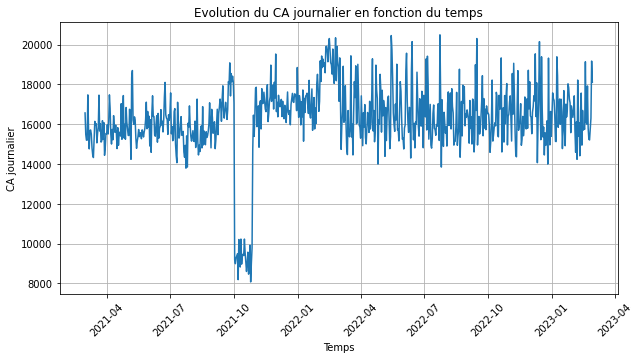

In [442]:
plt.figure(figsize=(10,5))
plt.plot(CA_temps['day'], CA_temps['CA'])
plt.title('Evolution du CA journalier en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('CA journalier')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [443]:
CA_tempsGlissant = CA_temps.rolling(30, center = True, on = 'day').mean()
CA_tempsGlissant = CA_tempsGlissant.sort_values('day')

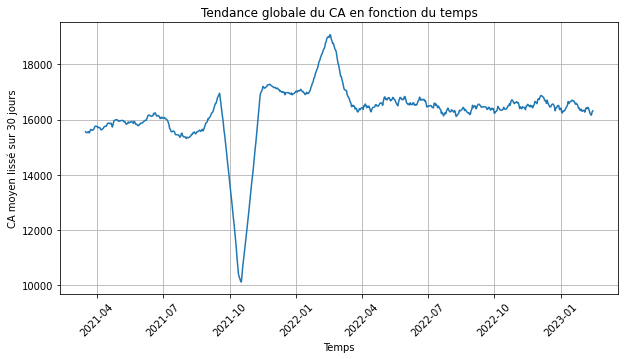

In [444]:
plt.figure(figsize=(10,5))
plt.plot(CA_tempsGlissant['day'], CA_tempsGlissant['CA'])
plt.title('Tendance globale du CA en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('CA moyen lissé sur 30 jours')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Evolution du chiffre d'affaire année par année

In [445]:
CA_temps['day'] = CA_temps['day'].astype(str)
CA_temps[['year','month','days']] = CA_temps.day.str.rsplit(pat = "-", expand=True)
CA_temps['date'] = CA_temps['month']+'-'+CA_temps['days']
CA_temps['day'] = CA_temps['day'].astype('datetime64[ns]')

In [446]:
CA_03_2021_02_2022 = CA_temps.loc[CA_temps['day']<'2022-03-01']
CA_03_2022_02_2023 = CA_temps.loc[CA_temps['day']>'2022-03-01']

In [ ]:
CA_03_2021_02_2022['year'] = 2021
CA_03_2022_02_2023['year'] = 2022
CA_temps_year = pd.concat([CA_03_2021_02_2022,CA_03_2022_02_2023])

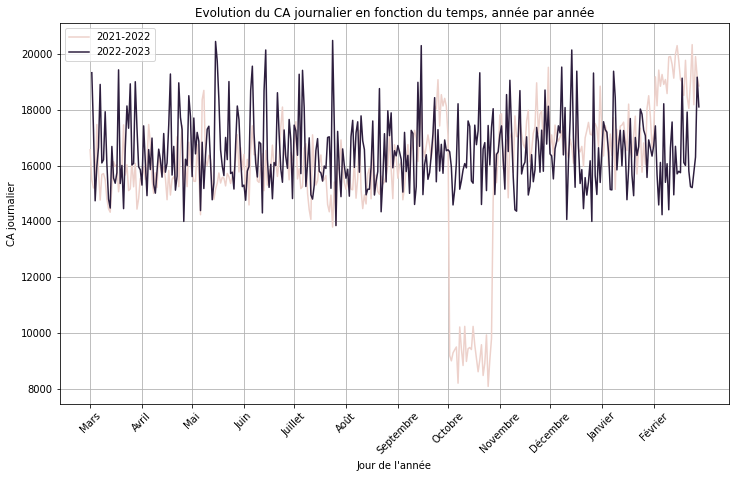

In [448]:
plt.figure(figsize = (12,7))
sns.lineplot(data=CA_temps_year, x="date", y="CA", hue="year")
plt.title('Evolution du CA journalier en fonction du temps, année par année')
plt.xlabel("Jour de l'année")
plt.ylabel('CA journalier')
plt.xticks(rotation=45,ticks = ["03-01","04-01","05-01","06-01","07-01","08-01","09-01","10-01","11-01","12-01","01-01","02-01"], labels = ["Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre", "Novembre","Décembre","Janvier","Février"])
plt.grid()
plt.legend(labels = ['2021-2022', '2022-2023'])
plt.show()

In [449]:
CA_tempsGlissant['day'] = CA_tempsGlissant['day'].astype(str)
CA_tempsGlissant[['year','month','days']] = CA_tempsGlissant.day.str.rsplit(pat = "-", expand=True)
CA_tempsGlissant['date'] = CA_tempsGlissant['month']+'-'+CA_tempsGlissant['days']
CA_tempsGlissant['day'] = CA_tempsGlissant['day'].astype('datetime64[ns]')

In [450]:
CA_2021 = CA_tempsGlissant.loc[CA_tempsGlissant['day']<'2022-03-01']
CA_2022 = CA_tempsGlissant.loc[CA_tempsGlissant['day']>'2022-03-01']

In [ ]:
CA_2021['year'] = 2021
CA_2022['year'] = 2022
CA_year = pd.concat([CA_2021,CA_2022])

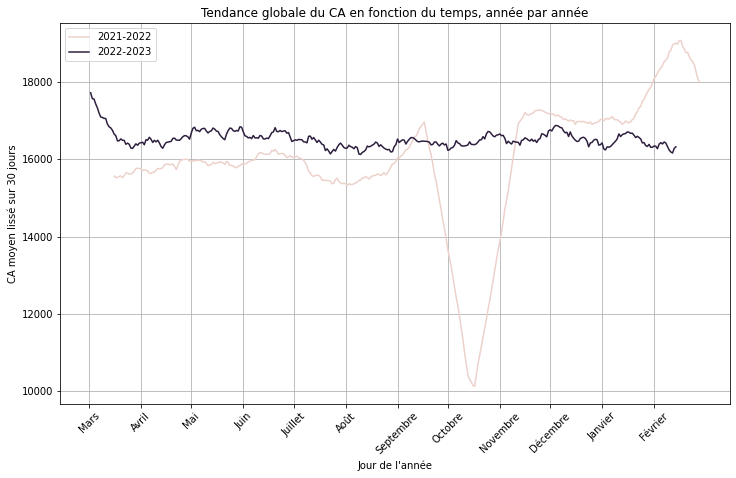

In [452]:
plt.figure(figsize = (12,7))
sns.lineplot(data=CA_year, x="date", y="CA", hue="year")
plt.title('Tendance globale du CA en fonction du temps, année par année')
plt.xlabel("Jour de l'année")
plt.ylabel('CA moyen lissé sur 30 jours')
plt.xticks(rotation=45, ticks = ["03-01","04-01","05-01","06-01","07-01","08-01","09-01","10-01","11-01","12-01","01-01","02-01"], labels = ["Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre", "Novembre","Décembre","Janvier","Février"])
plt.grid()
plt.legend(labels = ['2021-2022', '2022-2023'])
plt.show()

In [453]:
print("Le chiffre d'affaire entre le 1er mars 2021 et le 28 février 2022 est de", round(CA_03_2021_02_2022['CA'].sum(),2),"€")

Le chiffre d'affaire entre le 1er mars 2021 et le 28 février 2022 est de 5831737.05 €


In [454]:
print("Le chiffre d'affaire entre le 1er mars 2022 et le 28 février 2023 est de", round(CA_03_2022_02_2023['CA'].sum(),2),"€")

Le chiffre d'affaire entre le 1er mars 2022 et le 28 février 2023 est de 6004839.31 €


In [455]:
print("Le chiffre d'affaire a connu une augmentation de",round((CA_03_2022_02_2023['CA'].sum() - CA_03_2021_02_2022['CA'].sum())*100 / CA_03_2021_02_2022['CA'].sum(),2),"% d'une année sur l'autre")

Le chiffre d'affaire a connu une augmentation de 2.97 % d'une année sur l'autre


### Explication du trou du CA en octobre 2021

In [456]:
octobre21 = ctp.loc[ctp['day']>'2021-09-30' ]
octobre21 = octobre21[octobre21['day']<'2021-11-01' ]

In [457]:
ventes_octobre21 = pd.pivot_table(octobre21, index=['day'], columns = ['categ'],values = 'price', aggfunc=sum,margins=True,margins_name="Total")
ventes_octobre21

categ,0.0,1.0,2.0,Total
day,,,,
2021-10-01 00:00:00,6950.50,7003.79,3104.05,17058.34
2021-10-02 00:00:00,7141.01,NaN,2041.12,9182.13
2021-10-03 00:00:00,6786.57,NaN,2206.48,8993.05
2021-10-04 00:00:00,6533.60,NaN,2746.08,9279.68
2021-10-05 00:00:00,6357.91,NaN,3032.55,9390.46
2021-10-06 00:00:00,7546.58,NaN,1944.11,9490.69
2021-10-07 00:00:00,6404.01,NaN,1787.07,8191.08
2021-10-08 00:00:00,7069.53,NaN,3137.82,10207.35
2021-10-09 00:00:00,6808.69,NaN,2616.67,9425.36


Perte des données de ventes des articles de la catégorie 1 du 2 au 27 octobre 2021, ce qui explique la chute apparente du CA sur cette période

## 3. Analyse sur les références et les catégories de produits

In [458]:
print('Le catalogue contient', pd.unique(products['id_prod']).shape[0], "article répartis en", pd.unique(products['categ']).shape[0], "catégories, pour des tarifs allant de", str(products['price'].nsmallest(1 ,keep = 'first').values)[1:-1], "€ à", str(products['price'].nlargest(1 ,keep = 'first').values)[1:-1],"€" )

Le catalogue contient 3286 article répartis en 3 catégories, pour des tarifs allant de 0.62 € à 300. €


Cette analyse exclut les articles qui ne se sont pas du tout vendus.
Voici la liste de ces articles :

In [459]:
c_t_p[['id_prod','price','categ']].loc[c_t_p['session_id'].isna() & c_t_p['client_id'].isna()]

,id_prod,price,categ
679332,0_1016,35.06,0.0
679333,0_1780,1.67,0.0
679334,0_1062,20.08,0.0
679335,0_1119,2.99,0.0
679336,0_1014,1.15,0.0
679337,1_0,31.82,1.0
679338,0_1318,20.92,0.0
679339,0_1800,22.05,0.0
679340,0_1645,2.99,0.0
679341,0_322,2.99,0.0


### Chiffre d'affaires par produits


In [460]:
CA_products = ctp['price'].groupby(ctp['id_prod']).sum('price')
CA_products =CA_products.reset_index()
CA_products.rename(columns = {'price' : 'CA'}, inplace = True)
CA_products

,id_prod,CA
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


Top 10 des articles ayant généré le plus gros CA :

In [461]:
CA_products.nlargest(10, 'CA')

,id_prod,CA
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,54356.25
2591,1_369,54025.48
3043,2_110,53846.25
3201,2_39,53060.85
3104,2_166,52449.12


Top 10 des articles ayant généré le plus petit CA :

In [462]:
CA_products.nsmallest(10, 'CA')

,id_prod,CA
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
665,0_1601,1.99
1784,0_541,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


### Nombre de ventes par produit

In [463]:
ventes_products = ctp['price'].groupby(ctp['id_prod']).count()
ventes_products =ventes_products.reset_index()
ventes_products.rename(columns = {'price' : 'Nombre de ventes'}, inplace = True)
ventes_products

,id_prod,Nombre de ventes
0,0_0,1242
1,0_1,487
2,0_10,22
3,0_100,3
4,0_1000,432
...,...,...
3260,2_95,4
3261,2_96,598
3262,2_97,13
3263,2_98,1


Top 10 des articles ayant été vendus le plus de fois :

In [464]:
ventes_products.nlargest(10, 'Nombre de ventes')

,id_prod,Nombre de ventes
2591,1_369,2252
2644,1_417,2189
2641,1_414,2180
2733,1_498,2128
2653,1_425,2096
2629,1_403,1960
2639,1_412,1951
2640,1_413,1945
2632,1_406,1939
2633,1_407,1935


Top 10 des articles ayant été vendus le moins de fois :

In [465]:
ventes_products.nsmallest(10, 'Nombre de ventes')

,id_prod,Nombre de ventes
166,0_1151,1
313,0_1284,1
417,0_1379,1
549,0_1498,1
595,0_1539,1
665,0_1601,1
698,0_1633,1
752,0_1683,1
802,0_1728,1
1327,0_2201,1


### Chiffre d'affaires par catégorie de produit

#### CA par catégorie sur toute la période observée

In [466]:
CA_categ = ctp['price'].groupby(ctp['categ']).sum('price')
CA_categ =CA_categ.reset_index()
CA_categ = CA_categ.rename(columns = {'price' : 'CA'})

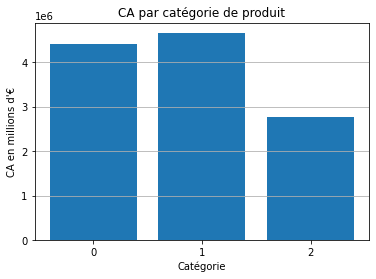

In [467]:
plt.bar(CA_categ['categ'], height= CA_categ['CA'])
plt.title('CA par catégorie de produit')
plt.xlabel("Catégorie")
plt.ylabel("CA en millions d'€")
plt.xticks(ticks = [0,1,2], labels = ["0","1","2"])
plt.grid(axis = 'y')
plt.show()

#### CA par catégorie d'une année sur l'autre

In [468]:
ventes_03_2021_02_2022 = ctp.loc[ctp['day']<'2022-03-01']
ventes_03_2021_02_2022['year'] = 2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [469]:
CA_categ_2021 = ventes_03_2021_02_2022['price'].groupby(ctp['categ']).sum('price')
CA_categ_2021 =CA_categ_2021.reset_index()
CA_categ_2021['year'] = 2021
CA_categ_2021 = CA_categ_2021.rename(columns = {'price' : 'CA'})

In [470]:
ventes_03_2022_02_2023 = ctp.loc[ctp['day']>'2022-03-01']
ventes_03_2022_02_2023['year'] = 2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [471]:
CA_categ_2022 = ventes_03_2022_02_2023['price'].groupby(ctp['categ']).sum('price')
CA_categ_2022 =CA_categ_2022.reset_index()
CA_categ_2022['year'] = 2022
CA_categ_2022 = CA_categ_2022.rename(columns = {'price' : 'CA'})

In [472]:
CA_categ_periode = pd.concat([CA_categ_2021,CA_categ_2022])

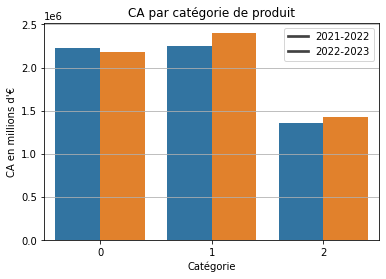

In [473]:
sns.barplot(data=CA_categ_periode , x="categ", y="CA", hue = 'year')
plt.title('CA par catégorie de produit')
plt.xlabel("Catégorie")
plt.ylabel("CA en millions d'€")
plt.xticks(ticks = [0,1,2], labels = ["0","1","2"])
plt.grid(axis = "y")
plt.legend(labels = ['2021-2022', '2022-2023'])
plt.show()

## 4. Profils clients et répartition du chiffre d'affaires

In [474]:
print("Nous avons un total de", pd.unique(customers['client_id']).shape[0], "clients, en majorité des femmes (",round((customers.loc[customers['sex'] == 'f'].shape[0])*100/customers.shape[0],2),"%).",c_t.loc[c_t['session_id'].isna()].shape[0], "de ces clients n'ont effectué aucun achat depuis le premier mars 2021.")

Nous avons un total de 8621 clients, en majorité des femmes ( 52.08 %). 21 de ces clients n'ont effectué aucun achat depuis le premier mars 2021.


Calcul de la proportion de clients hommes ou femmes :

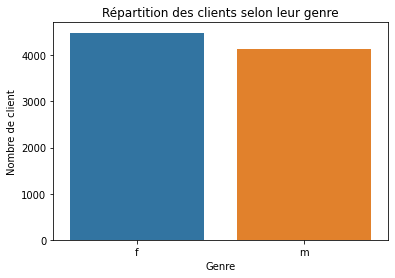

In [475]:
sns.countplot(data=customers, x='sex')
plt.title('Répartition des clients selon leur genre')
plt.xlabel("Genre")
plt.ylabel("Nombre de client")
plt.show()

Distribution des âges des clients en fonction du genre :

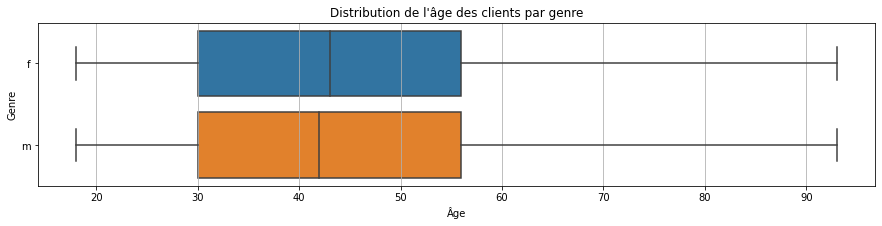

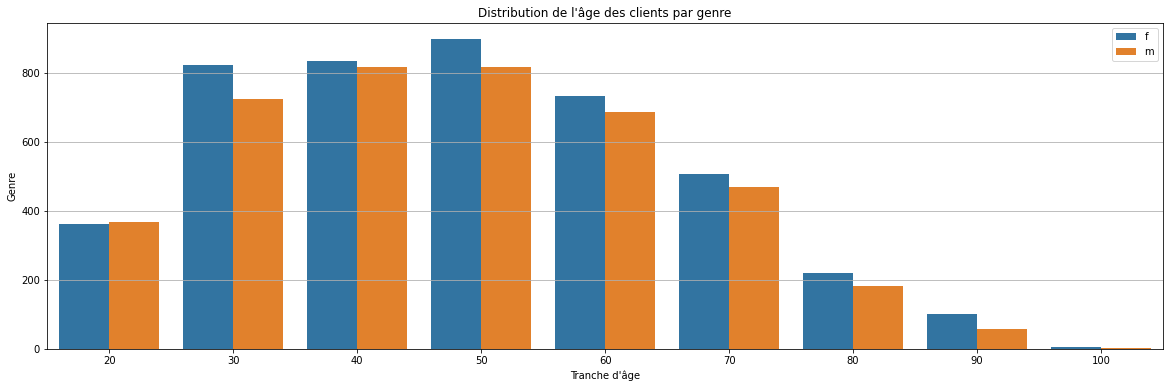

In [476]:
plt.figure(figsize =(15,3))
fig1 = sns.boxplot(data=customers, x="Age", y = 'sex')
plt.title("Distribution de l'âge des clients par genre")
plt.xlabel("Âge")
plt.ylabel("Genre")
plt.grid(axis = 'x')

plt.figure(figsize =(20,6))
fig2 = sns.countplot(data=customers, x="Tranche d'âge", hue = 'sex')
plt.title("Distribution de l'âge des clients par genre")
plt.xlabel("Tranche d'âge")
plt.ylabel("Genre")
plt.grid(axis = 'y')
plt.legend()

plt.show()

La distribution des âges entre hommes et femmes est similaire.

Courbe de Lorenz des montants totaux de ventes par client :

In [477]:
CA_cust = ctp['price'].groupby(ctp['client_id']).sum()
CA_cust =CA_cust.reset_index()
CA_cust = CA_cust.sort_values('price')

In [478]:
dep = -CA_cust['price'].values
n = len(dep)

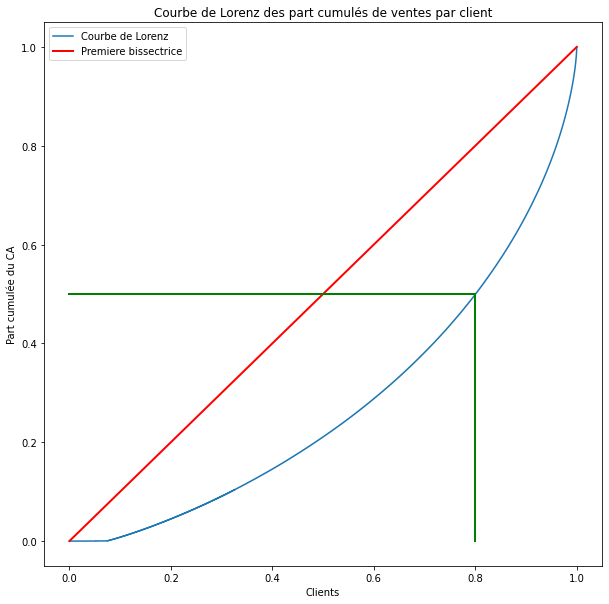

In [479]:
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.figure(figsize = (10,10))
lorenz = plt.plot(lorenz,xaxis,drawstyle='steps-post', label ='Courbe de Lorenz')
biss =plt.plot([0.0, 1.0], [0.0, 1.0], 'r-', lw=2, label = 'Premiere bissectrice') # Red straight line
x = plt.plot([0.8, 0.8], [0, 0.5], 'g-', lw=2) # Red straight line
y = plt.plot([0, 0.8], [0.5, 0.5], 'g-', lw=2) # Red straight line

plt.title("Courbe de Lorenz des part cumulés de ventes par client")
plt.xlabel("Clients")
plt.ylabel("Part cumulée du CA")
plt.legend()
plt.show()

La coubre de Lorenz nous renseigne sur la répartition des ventes entre nos différents clients. Notre courbe étant éloignée de la bissectrice, cela nous indique que la répartition n'est pas égalitaire. 

A titre d'exemple, on peut voir ici que la moitié de notre chiffre d'affaire total sur la période observée n'est le fait que de 20% de notre clientèle.

# Partie 2 : Etude du comportement client : Recherche de corrélations

Il s'agit ici d'effectuer une analyse plus ciblée sur les clients afin de comprendre le comportement de nos clients en ligne.

Nous allons donc chercher d'hypothétiques liens de corrélations entre nos différentes variables. 

## Avant les analyses, exclusion des clients B to B

Nous allons dans un premier temps isoler les clients B to B dont la présence dans nos analyses pourrait fausser les résultats.

In [480]:
CA_client = ctp[['client_id','price']].groupby('client_id').sum()
CA_client = CA_client.reset_index()
CA_client = pd.merge(customers, CA_client, how = 'right', on = 'client_id')
CA_client = CA_client.rename(columns = {'price' : 'CA'})
CA_client.head()

,client_id,sex,birth,Age,Tranche d'âge,CA
0,c_1,m,1955,67,70,558.18
1,c_10,m,1956,66,70,1353.60
2,c_100,m,1992,30,30,254.85
3,c_1000,f,1966,56,60,2261.89
4,c_1001,m,1982,40,40,1812.86


In [481]:
P = np.percentile(CA_client.CA, [0, 99.96])
CA_client_BtoB = CA_client[(CA_client.CA > P[1]) | (CA_client.CA < P[0])]
CA_client_BtoB

,client_id,sex,birth,Age,Tranche d'âge,CA
677,c_1609,m,1980,42,50,324033.35
2724,c_3454,m,1969,53,60,113637.93
4388,c_4958,m,1999,23,30,289760.34
6337,c_6714,f,1968,54,60,153598.92


In [482]:
ctp_total = ctp

In [483]:
ctp = ctp.loc[(ctp['client_id'] != 'c_1609') & (ctp['client_id'] != 'c_3454') & (ctp['client_id'] != 'c_4958') & (ctp['client_id'] != 'c_6714')]

## 1. Le lien entre le genre d’un client et les catégories des livres achetés

On commence par visualiser les informations qui nous intéressent en générant un tableau de contingence

In [484]:
cont = pd.pivot_table(ctp, index=['sex'], columns = ['categ'],values = 'session_id', aggfunc=len,margins=True,margins_name="Total")
cont.columns.name = "Tableau de contingence"
cont

Tableau de contingence,0.0,1.0,2.0,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


On cherche ici à savoir si nos variables "sex" et "categ" sont indépendantes.
Nous cherchons donc une corrélation entre deux variables qualitatives, nous allons donc faire un chi² pour tester cette corrélation.

Nous posons l'hypothèse nulle H0 : Il n'y a pas de corrélation entre nos deux variables 

Et l'hypothèse alternative H1 : Il existe une corrélation entre le genre du client et la catégorie d'article acheté

In [485]:
X = "sex"
Y = "categ"

cont_categ_sex = ctp[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = ctp[X].value_counts()
ty = ctp[Y].value_counts()

cont_categ_sex = cont_categ_sex.astype(int)

In [486]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_categ_sex)

In [487]:
indep = pd.DataFrame(st_exp, index = ['m', 'f'], columns = ['0.0', '1.0', '2.0'])
indep.columns.name = "Tableau d'indépendance"
indep

Tableau d'indépendance,0.0,1.0,2.0
m,201518.357543,110493.466469,17092.175987
f,185762.642457,101854.533531,15755.824013


In [488]:
freq = (cont_categ_sex-st_exp)**2/st_exp
freq.columns.name = "Mesure du khi2-2"
freq.round(2)

Mesure du khi2-2,0.0,1.0,2.0
sex,,,
f,2.61,6.35,0.74
m,2.83,6.89,0.80


In [489]:
stat_AM = {'Chi2' : st.chi2_contingency(cont_categ_sex)}
test = pd.DataFrame([st_chi2,st_p]).round(4).rename(index={0:'Valeur du test',1:'P-Value'}, columns ={0 : 'Chi2'})
test

,Chi2
Valeur du test,20.2135
P-Value,0.0000


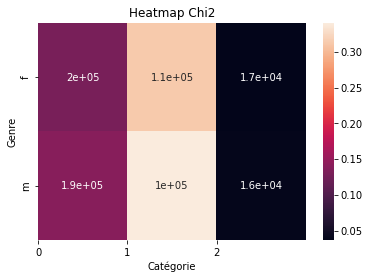

In [490]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(ctp)
indep = tx.dot(ty) / n

c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap Chi2')
plt.xlabel("Catégorie")
plt.ylabel('Genre')
plt.xticks( ticks = [0,1,2], labels = ["0",'1','2'])
plt.show()

In [491]:
print('Le test khi-2 global présente une statistique de',st_chi2.round(2),'et une p-value de',st_p,', donc inférieure à alpha = 0.05')
print("L'hypothèse nulle est rejetée, il existe une corrélation entre le sexe et la catégorie de produit acheté.")

Le test khi-2 global présente une statistique de 20.21 et une p-value de 4.080400389217356e-05 , donc inférieure à alpha = 0.05
L'hypothèse nulle est rejetée, il existe une corrélation entre le sexe et la catégorie de produit acheté.


## 2. Le lien entre l’âge des clients et le montant total des achats

On commence par préparer nos données en les agrégeant par client : 

In [492]:
CA_client = ctp[['client_id','price']].groupby('client_id').sum()
CA_client = CA_client.reset_index()
CA_client = pd.merge(customers, CA_client, how = 'right', on = 'client_id')
CA_client = CA_client.rename(columns = {'price' : 'CA'})
CA_client.head()

,client_id,sex,birth,Age,Tranche d'âge,CA
0,c_1,m,1955,67,70,558.18
1,c_10,m,1956,66,70,1353.60
2,c_100,m,1992,30,30,254.85
3,c_1000,f,1966,56,60,2261.89
4,c_1001,m,1982,40,40,1812.86


### Analyse sur l'ensemble des données

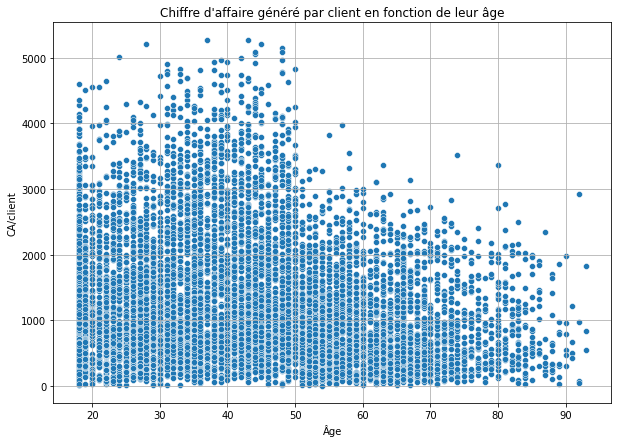

In [494]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = CA_client, x = 'Age', y='CA')
plt.title("Chiffre d'affaire généré par client en fonction de leur âge")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()
plt.show()

Nous commençons par vérifier si nos données sont distribuées selon la loi normale avec un test de Shapiro.

H0 : La distribution de notre variable suit la loi normale

H1 : La distribution de notre variable ne suit pas la loi normale

In [ ]:
stat,pvalue = st.shapiro(ctp['Age'].dropna())

In [496]:
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9712284803390503
P-value =  0.0


La p-value est de 0.0 , donc inférieure à 0,05, on rejette l'hypothèse nulle ▶ La variable  "Age"  ne suit pas la loi normale.

Toutes nos prochaines analyses prenant en compte cette variable devront donc être effectuées avec des tests non paramétriques.

Nous faisons une analyse de corrélation entre deux variables quantitatives sur des données dont la distribution ne suit pas la loi normale.

Nous utilisons donc le test non paramétrique de Spearman.

H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et le montant total de leurs achats

In [497]:
stat_AM = {'Spearman' : st.spearmanr(CA_client['CA'],CA_client['Age'])}
test = pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})
test

,Spearman
Valeur du test,-0.1851
P-Value,0.0000


In [498]:
montant = CA_client.groupby('Age').CA.mean()
slope, intercept, r_value, p_value, std_err = st.linregress(montant.index,montant)
line = slope*montant.index+intercept

Le modèle linéaire est de la forme : y = ax + b
a = -10.56002864898663
b = 1729.3299164420923
R² de  0.5727793633915972


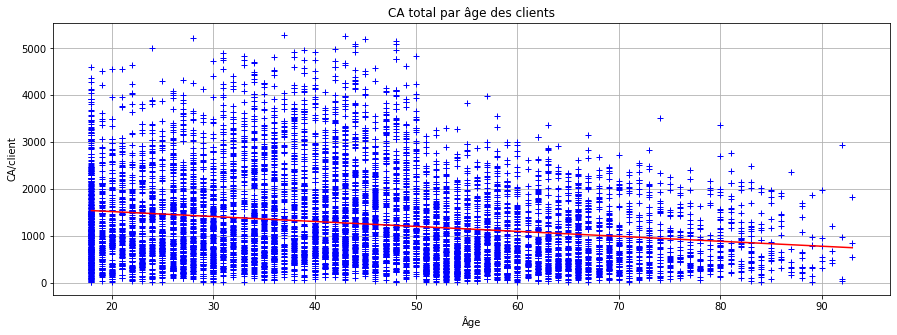

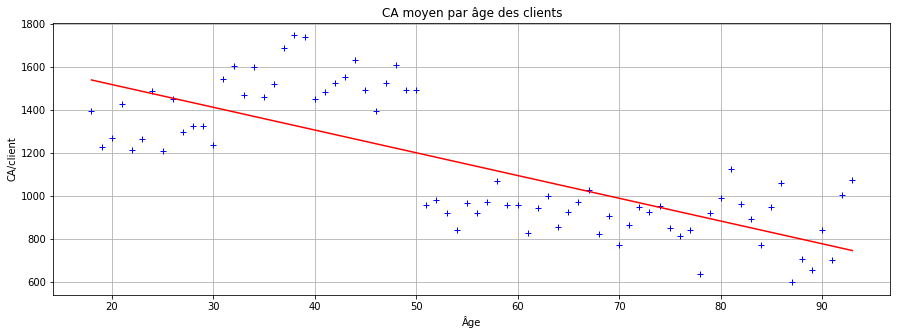

In [499]:
plt.figure(1, figsize=(15, 5))
fig1=plt.plot(CA_client['Age'], CA_client['CA'], color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA total par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.figure(2, figsize=(15, 5))
fig2 =plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA moyen par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

print('Le modèle linéaire est de la forme : y = ax + b')
print('a =',slope)
print('b =', intercept)
print('R² de ', r_value**2)


Le test de Spearman présente une statistique de -0.1851 et une p-value de 0 , donc inférieure à alpha = 0.05%

L'hypothèse nulle est donc rejetée, il existe une corrélation entre l'âge des clients et le montant total de leurs achats.

### Analyse sur données séparées à 50 ans

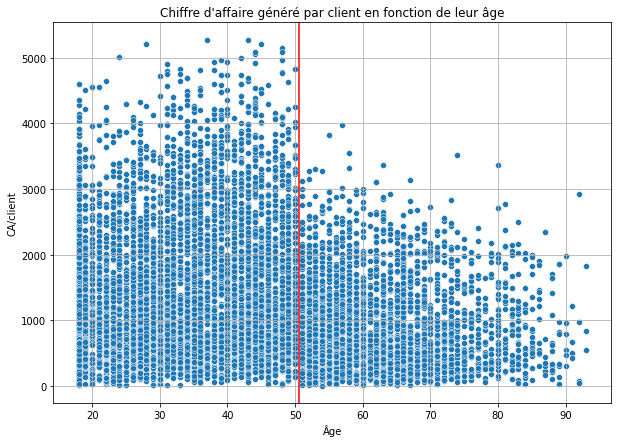

In [500]:
plt.figure(figsize = (10,7))
plt.axvline(x=50.5, color ='red')
sns.scatterplot(data = CA_client, x = 'Age', y='CA')
plt.title("Chiffre d'affaire généré par client en fonction de leur âge")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()
plt.show()

Deux tendance semblent émerger de l'analyse précédente : 
* Une en dessous de 50 ans
* Une autre au dessus de 50 ans

Nous allons donc maintenant faire maintenant deux analyses disctinctes sur les tranches d'âges 18-50 et 50-100

In [501]:
CA_moins50 = CA_client.loc[CA_client['Age']<=50]
CA_plus50 = CA_client.loc[CA_client['Age']>50]

CAmoyen_moins50 = CA_moins50.groupby('Age').CA.mean()
CAmoyen_plus50 = CA_plus50.groupby('Age').CA.mean()

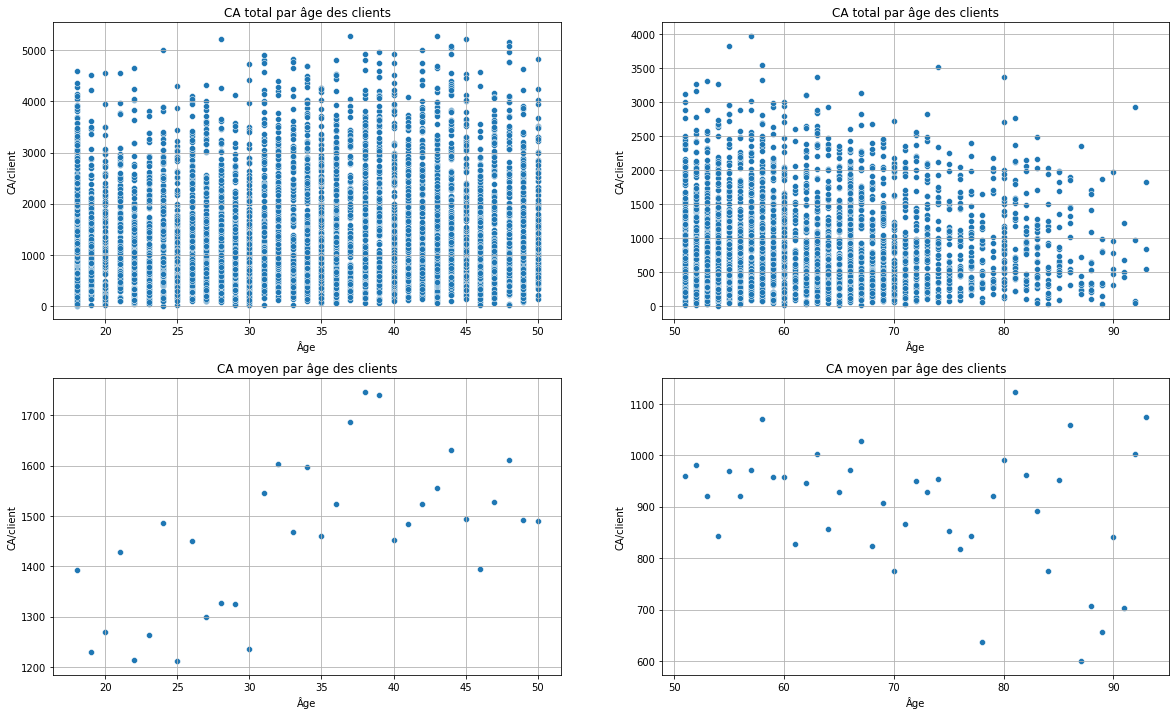

In [502]:
plt.figure(1,figsize=(20,12))

plt.subplot(2, 2, 1)
sns.scatterplot(data = CA_moins50, x = 'Age', y='CA')
plt.title("CA total par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.subplot(2, 2, 3)
sns.scatterplot(data = CAmoyen_moins50 , x = CAmoyen_moins50.index, y=CAmoyen_moins50 )
plt.title("CA moyen par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.subplot(2, 2, 2)
sns.scatterplot(data = CA_plus50, x = 'Age', y='CA')
plt.title("CA total par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.subplot(2, 2, 4)
sns.scatterplot(data = CAmoyen_plus50 , x = CAmoyen_plus50.index, y=CAmoyen_plus50 )
plt.title("CA moyen par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.show()

**Test de Spearman sur les effectifs de moins de 50 ans :**



H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et le montant total de leurs achats

In [503]:
stat_AM = {'Spearman' : st.stats.spearmanr(CA_moins50['CA'],CA_moins50['Age'])}
pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})

,Spearman
Valeur du test,0.0699
P-Value,0.0000


In [504]:
montant = CA_moins50.groupby('Age').CA.mean()
slope, intercept, r_value, p_value, std_err = st.linregress(montant.index,montant)
line = slope*montant.index+intercept

Le modèle linéaire est de la forme : y = ax + b
a = 9.289734331977733
b = 1143.3973890137486
R² de  0.36481349337573515


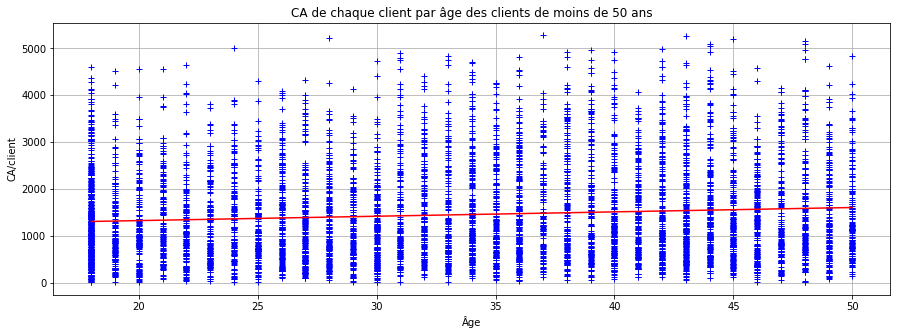

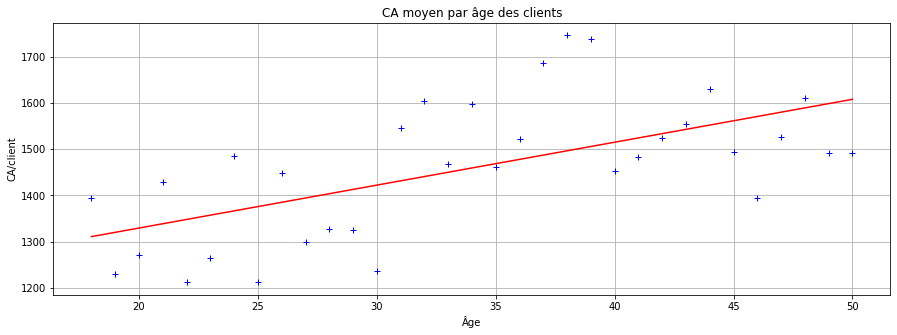

In [505]:
plt.figure(1, figsize=(15, 5))
fig1 =plt.plot(CA_moins50['Age'], CA_moins50['CA'], color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA de chaque client par âge des clients de moins de 50 ans")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.figure(2, figsize=(15, 5))
fig2 =plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA moyen par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

print('Le modèle linéaire est de la forme : y = ax + b')
print('a =',slope)
print('b =', intercept)
print('R² de ', r_value**2)


La p-value est inférieure à 0.05, on rejette l'hypothèse nulle ▶ Il existe une faible corrélation positive entre l'âge des clients de moins de 50 ans et le montant total de leurs achats.

**Test de Spearman sur les effectifs de plus de 50 ans :**

H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et le montant total de leurs achats

In [506]:
stat_AM = {'Spearman' : st.spearmanr(CA_plus50['CA'],CA_plus50['Age'])}
pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})

,Spearman
Valeur du test,-0.0217
P-Value,0.2374


In [507]:
montant = CA_plus50.groupby('Age').CA.mean()
slope, intercept, r_value, p_value, std_err = st.linregress(montant.index,montant)
line = slope*montant.index+intercept

Le modèle linéaire est de la forme : y = ax + b
a = -2.6825574586803356
b = 1093.880812611977
R² de  0.08092708010882609


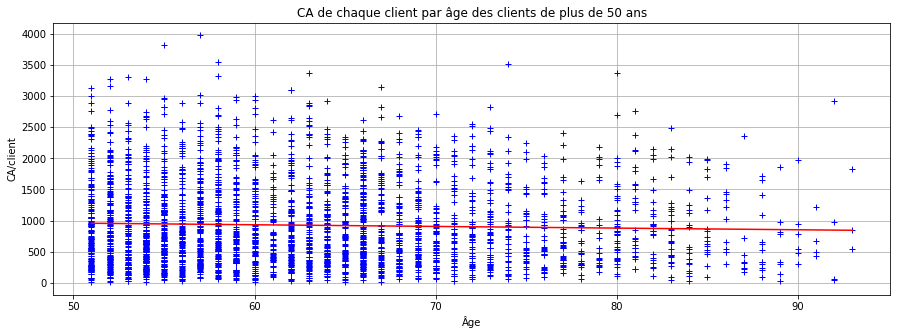

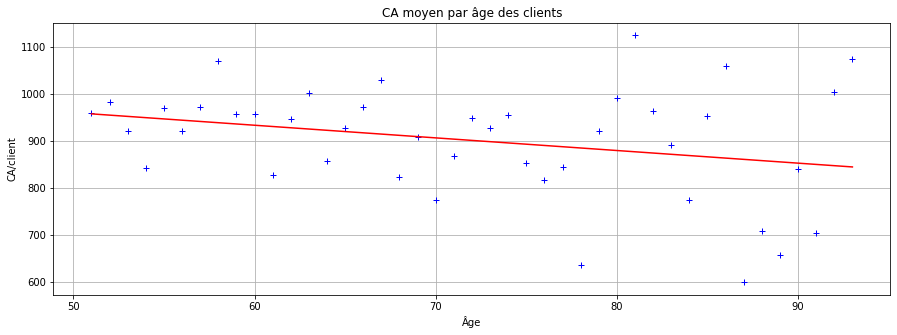

In [508]:
plt.figure(1, figsize=(15, 5))
fig1 = plt.plot(CA_plus50['Age'], CA_plus50['CA'], color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA de chaque client par âge des clients de plus de 50 ans")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

plt.figure(2, figsize=(15, 5))
fig2 =plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("CA moyen par âge des clients")
plt.xlabel("Âge")
plt.ylabel("CA/client")
plt.grid()

print('Le modèle linéaire est de la forme : y = ax + b')
print('a =',slope)
print('b =', intercept)
print('R² de ', r_value**2)


La p-value est supérieure à 0.05, on ne rejette pas l'hypothèse nulle ▶ On ne peut mettre en évidence de corrélation l'âge des clients de plus de 50 ans et le montant total de leurs achats.

### **CONCLUSION GENERALE**

En séparant nos clients en deux différents groupes d'âges, il apparait que les comportements d'achats différent avant et après 50 ans. Avant 50 ans, il y a une faible corrélation positive entre l'âge et le montant total des achats. En revanche, après 50 ans, on ne peut mettre en évidence de corrélation entre l'âge et le montant total des achats par client.

**Autrement dit, jusqu'à 50 ans, plus les clients sont agés et plus ils achètent pour un montant total élevé.**

## 3. Le lien entre l’âge des clients et la fréquence d’achat

J'agrège d'abords les données par session pour ne pas compter en plusieurs achats un seul achat multiple  :

In [509]:
nbArticles_session = ctp[['price','session_id']].groupby('session_id').count()
nbArticles_session = nbArticles_session.rename(columns = {'price' : "nombre d'articles"})
nbArticles_session.head()

,nombre d'articles
session_id,
s_1,1
s_10,1
s_100,2
s_1000,4
s_10000,3


In [510]:
ctp_session_age = pd.merge(nbArticles_session, ctp[['session_id','client_id', 'Age','birth','day',"Tranche d'âge"]], on = 'session_id')
ctp_session_age = ctp_session_age.drop_duplicates(subset = 'session_id')
ctp_session_age.head()

,session_id,nombre d'articles,client_id,Age,birth,day,Tranche d'âge
0,s_1,1,c_329,55,1967,2021-03-01,60
1,s_10,1,c_2218,52,1970,2021-03-01,60
2,s_100,2,c_3854,44,1978,2021-03-01,50
4,s_1000,4,c_1014,33,1989,2021-03-03,40
8,s_10000,3,c_476,33,1989,2021-03-22,40


In [511]:
frequenceAchat_client = ctp_session_age[['client_id','session_id']].groupby('client_id').count()
frequenceAchat_client = frequenceAchat_client.rename(columns = {'session_id' : "nombre d'achats"})
frequenceAchat_client["achats_an"] = frequenceAchat_client["nombre d'achats"]/2
frequenceAchat_client["achats_mois"] = frequenceAchat_client["nombre d'achats"]/24
frequenceAchat_client = pd.merge(frequenceAchat_client, ctp[['client_id', 'Age','birth', "Tranche d'âge"]], on = 'client_id')
frequenceAchat_client = frequenceAchat_client.drop_duplicates(subset = 'client_id')
frequenceAchat_client.head()

,client_id,nombre d'achats,achats_an,achats_mois,Age,birth,Tranche d'âge
0,c_1,33,16.5,1.375000,67,1955,70
39,c_10,34,17.0,1.416667,66,1956,70
97,c_100,5,2.5,0.208333,30,1992,30
105,c_1000,93,46.5,3.875000,56,1966,60
230,c_1001,47,23.5,1.958333,40,1982,40


In [512]:
frequenceAchat_age = frequenceAchat_client[['Age',"nombre d'achats", 'achats_an','achats_mois']].groupby('Age').mean()
frequenceAchat_age.head()

,nombre d'achats,achats_an,achats_mois
Age,,,
18,19.665904,9.832952,0.819413
19,17.703448,8.851724,0.737644
20,17.958621,8.979310,0.748276
21,19.448000,9.724000,0.810333
22,17.801471,8.900735,0.741728


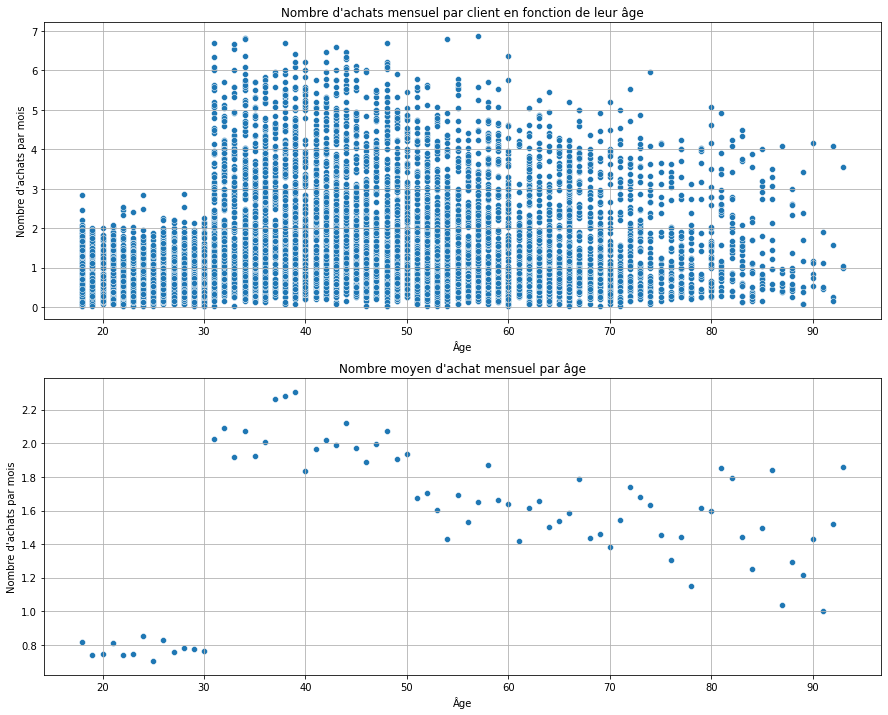

In [514]:
plt.figure(1,figsize=(15,12))

plt.subplot(2, 1, 1)
sns.scatterplot(data = frequenceAchat_client , x = 'Age' , y= 'achats_mois')
plt.title("Nombre d'achats mensuel par client en fonction de leur âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()

plt.subplot(2, 1, 2)
sns.scatterplot(data = frequenceAchat_age , x = 'Age' , y= 'achats_mois')
plt.title("Nombre moyen d'achat mensuel par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()

plt.show()

### Test sur l'ensemble des âges

Nous faisons une analyse de corrélation entre deux variables quantitatives sur des données dont la distribution ne suit pas la loi normale.

Nous utilisons donc le test non paramétrique de Spearman.

H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et leur fréquence d'achats

In [515]:
stat_AM = {'Spearman' : st.spearmanr(frequenceAchat_client['achats_mois'],frequenceAchat_client['Age'])}
pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})

,Spearman
Valeur du test,0.2123
P-Value,0.0000


In [516]:
montant = frequenceAchat_client.groupby('Age').achats_mois.mean()
slope, intercept, r_value, p_value, std_err = st.linregress(montant.index,montant)
line = slope*montant.index+intercept

Le modèle linéaire est de la forme : y = ax + b
a = 0.003324546290146291
b = 1.3511327512079672
R² de  0.027630589903612533


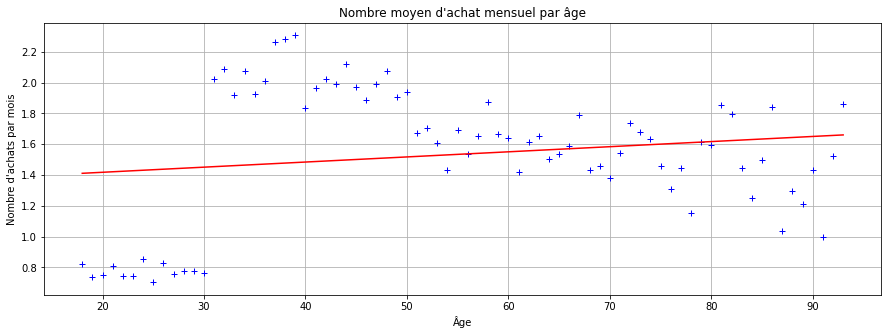

In [517]:
plt.figure(1, figsize=(15, 5))
plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("Nombre moyen d'achat mensuel par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()
print('Le modèle linéaire est de la forme : y = ax + b')
print('a =',slope)
print('b =', intercept)
print('R² de ', r_value**2)


**La p-value est inférieure à 0.05, on rejette l'hypothèse nulle ▶ Il existe une faible corrélation positive entre l'âge des clients et leur fréquence d'achats.**

### Test âges séparés à 30 ans

Deux tendance semblent émerger de l'analyse précédente : 
* Une en dessous de 30 ans
* Une autre au dessus de 30 ans

Nous allons donc maintenant faire maintenant deux analyses disctinctes sur les tranches d'âges 18-30 et 30-100

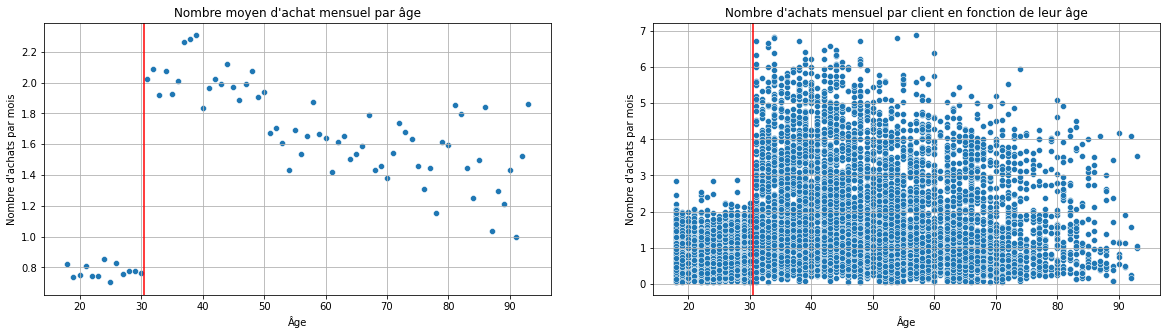

In [518]:
plt.figure(1,figsize=(20,5))

plt.subplot(1, 2, 1)
plt.axvline(x=30.5,color = 'red')
sns.scatterplot(data = frequenceAchat_age, x = 'Age', y='achats_mois')
plt.title("Nombre moyen d'achat mensuel par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()

plt.subplot(1, 2, 2)
plt.axvline(x=30.5,color = 'red')
sns.scatterplot(data = frequenceAchat_client, x = 'Age', y='achats_mois')
plt.title("Nombre d'achats mensuel par client en fonction de leur âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()

plt.show()

In [519]:
frequenceAchat_moins30 = frequenceAchat_client.loc[frequenceAchat_client['Age']<=30]
frequenceAchat_moins30_age = frequenceAchat_moins30[['Age','achats_mois']].groupby('Age').mean()
frequenceAchat_moins30_age = frequenceAchat_moins30_age.reset_index()

frequenceAchat_plus30 = frequenceAchat_client.loc[frequenceAchat_client['Age']>30]
frequenceAchat_plus30_age = frequenceAchat_plus30[['Age','achats_mois']].groupby('Age').mean()
frequenceAchat_plus30_age = frequenceAchat_plus30_age.reset_index()


**Test de Spearman sur les effectifs de moins de 30 ans :**

H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et leur fréquence d'achats

In [520]:
stat_AM = {'Spearman' : st.spearmanr(frequenceAchat_moins30_age['achats_mois'],frequenceAchat_moins30_age['Age'])}
pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})

,Spearman
Valeur du test,0.1374
P-Value,0.6545


La p-value est supérieure à 0.05, on ne rejette pas l'hypothèse nulle ▶ On ne peut conclure à l'existe d'une corrélation entre l'âge des clients et leur fréquence d'achats.

**Test de Spearman sur les effectifs de plus de 30 ans :**

H0 : Il n'y a pas de corrélation entre nos deux variables

H1 : Il existe une corrélation entre l'âge des clients et leur fréquence d'achats

In [521]:
stat_AM = {'Spearman' : st.spearmanr(frequenceAchat_plus30_age['achats_mois'],frequenceAchat_plus30_age['Age'])}
pd.DataFrame(stat_AM).round(4).rename(index={0:'Valeur du test',1:'P-Value'})

,Spearman
Valeur du test,-0.7574
P-Value,0.0000


In [522]:
montant = frequenceAchat_plus30_age.groupby('Age').achats_mois.mean()
slope, intercept, r_value, p_value, std_err = st.linregress(montant.index,montant)
line = slope*montant.index+intercept

Le modèle linéaire est de la forme : y = ax + b
a = -0.012230260776190879
b = 2.451171389362277
R² de  0.5664475682414433


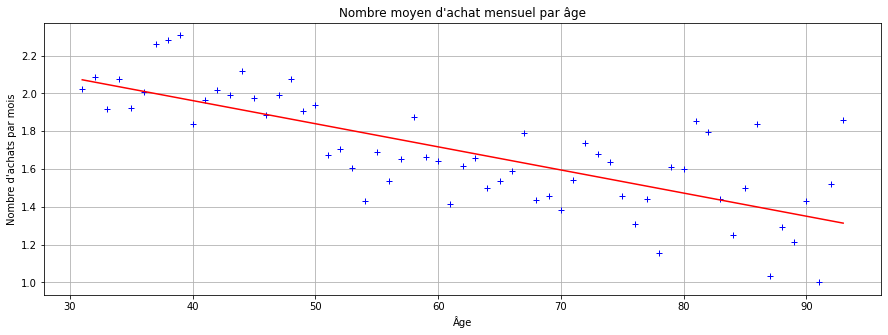

In [523]:
plt.figure(1, figsize=(15, 5))
plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title("Nombre moyen d'achat mensuel par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats par mois")
plt.grid()
print('Le modèle linéaire est de la forme : y = ax + b')
print('a =',slope)
print('b =', intercept)
print('R² de ', r_value**2)


La p-value est inférieure à 0.05, on rejette l'hypothèse nulle ▶ Il existe une forte corrélation négative entre l'âge des clients de plus de 30 ans et la fréquence d'achats.

### Test de comparaison des moyennes

Nous allons maintenant vérifier s'il existe une différence entre nos deux groupes moins et plus de 30 ans.

Pour cela nous allons utiliser un test non paramtétrique de comparaison des moyennes, le test de Wilcoxon Mann-whitney

H0 : Les moyennes de fréquence d'achats sont les mêmes entre les groupes plus et moins de 30 ans

H1 : Les moyennes de fréquence d'achats sont différentes entre les groupes plus 
et moins de 30 ans

In [524]:
res = st.mannwhitneyu(frequenceAchat_moins30['achats_mois'], frequenceAchat_plus30['achats_mois'], alternative = 'two-sided')
pd.DataFrame(res).round(6).rename(index={0:'Valeur du test',1:'P-Value'}, columns= {0: 'Test de Wilcoxon'})

,Test de Wilcoxon
Valeur du test,3566665.0
P-Value,0.0


La p-value est inférieure à 0.05, on rejette H0 ▶ Il existe bien une différence de fréquence d'achats entre les moins et les plus de 30 ans. 

### **CONCLUSION GENERALE**

En séparant nos clients en deux différents groupes d'âges, il apparait que les comportements d'achats différent avant et après 30 ans concernant la fréquence d'achats. Avant 30 ans, il n'y a pas de corrélation entre l'âge et la fréquence d'achat. En revanche, après 30, il y a une forte corrélation négative entre l'âge et la fréquence d'achats.

Il y a cependant bien une différence de fréquence d'achat moyenne entre les moins et plus de 30 ans.

**Autrement dit, nos clients de plus de 30 ans achètent significativement plus souvent que les moins de 30 ans. Cependant, à partir de cet âge la fréquence d'achats décroit rapidement avec l'âge.**

## 4. Le lien entre l’âge des clients et la taille du panier moyen

In [525]:
CA_session = ctp[['price','session_id']].groupby('session_id').sum()
ctp_session = pd.merge(CA_session, ctp_session_age, on = 'session_id')
ctp_session = ctp_session.rename(columns = {'price' : 'Montant du panier'})
ctp_session.head()

,session_id,Montant du panier,nombre d'articles,client_id,Age,birth,day,Tranche d'âge
0,s_1,11.99,1,c_329,55,1967,2021-03-01,60
1,s_10,26.99,1,c_2218,52,1970,2021-03-01,60
2,s_100,33.72,2,c_3854,44,1978,2021-03-01,50
3,s_1000,39.22,4,c_1014,33,1989,2021-03-03,40
4,s_10000,41.49,3,c_476,33,1989,2021-03-22,40


In [526]:
CA_session_age = ctp_session[['Age','Montant du panier',"nombre d'articles"]].groupby('Age').mean()
CA_session_age.head()

,Montant du panier,nombre d'articles
Age,,
18,70.864986,1.762741
19,69.417912,1.702766
20,70.728629,1.760369
21,73.425627,1.749074
22,68.156952,1.822800


### Analyse sur le nombre d'articles par panier

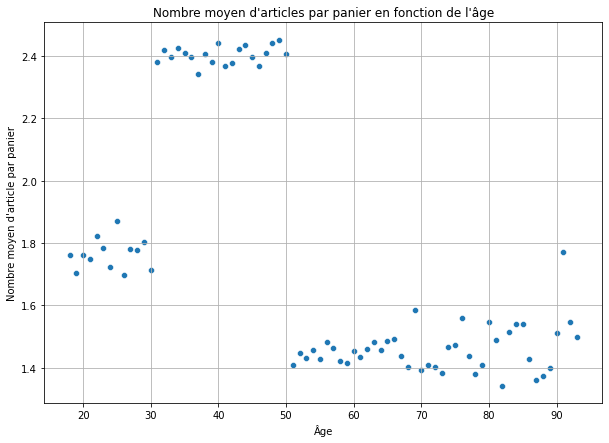

In [527]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = CA_session_age, x = 'Age' , y= "nombre d'articles")
plt.title("Nombre moyen d'articles par panier en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre moyen d'article par panier")
plt.grid()
plt.show()

On observe trois groupes distincts en fonction des catégories d'âges.
Afin de pousser l'analyse, nous allons découper notre variables "Age" en quatre groupes :
* 18-30 ans
* 31-50 ans
* 51-70 ans
* 71-100 ans

In [528]:
ctp_session['tranche_age'] = "Na"
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 20] = '18-30'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 30] = '18-30'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 40] = '31-50'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 50] = '31-50'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 60] = '51-70'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 70] = '51-70'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 80] = '71-100'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 90] = '71-100'
ctp_session['tranche_age'].loc[ctp_session["Tranche d'âge"] == 100] = '71-100'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [529]:
ctp_session.head()

,session_id,Montant du panier,nombre d'articles,client_id,Age,birth,day,Tranche d'âge,tranche_age
0,s_1,11.99,1,c_329,55,1967,2021-03-01,60,51-70
1,s_10,26.99,1,c_2218,52,1970,2021-03-01,60,51-70
2,s_100,33.72,2,c_3854,44,1978,2021-03-01,50,31-50
3,s_1000,39.22,4,c_1014,33,1989,2021-03-03,40,31-50
4,s_10000,41.49,3,c_476,33,1989,2021-03-22,40,31-50


La variable "Age" est maintenant qualitative

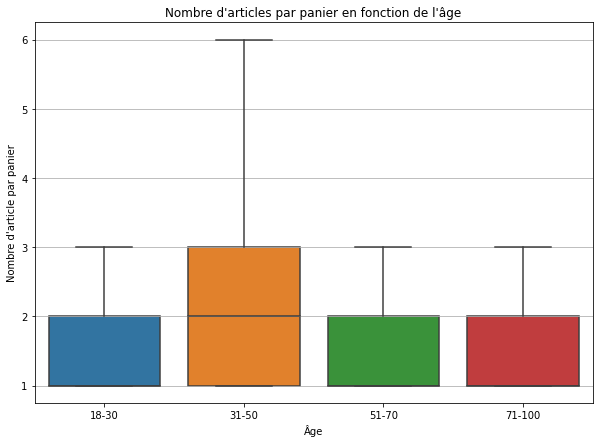

In [530]:
plt.figure(figsize = (10,7))
sns.boxplot(data = ctp_session, x = 'tranche_age', y ="nombre d'articles",showfliers = False, order=["18-30", "31-50", "51-70","71-100"])
plt.title("Nombre d'articles par panier en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'article par panier")
plt.grid(axis = "y")
plt.show()

In [531]:
st.shapiro(ctp_session["nombre d'articles"].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.762825608253479, pvalue=0.0)

Notre variable "nombre d'articles" ne suit pas la loi normale.

Nous souhaitons vérifier la corrélation entre une variable qualitative et une variable quantitave. Comme notre variable "Nombre d'articles" ne suis pas la loi normale, nous utilisons un test non paramétrique.

Nous allons donc faire un test de Kruskall-Wallis

L’hypothèse nulle (H0) : La médiane est la même pour tous les groupes de données ▶ Il n'y a pas de corrélation entre l'âge de nos clients et le nombre d'article par panier

L’hypothèse alternative : (H1) : La médiane n’est pas égale pour tous les groupes de données ▶ Il y a une corrélation entre l'âge de nos clients et le nombre d'articles par panier

In [532]:
res = st.kruskal(ctp_session["nombre d'articles"].loc[ctp_session['tranche_age'] == "18-30"].dropna(),ctp_session["nombre d'articles"].loc[ctp_session['tranche_age'] == "31-50"].dropna(), ctp_session["nombre d'articles"].loc[ctp_session['tranche_age'] == "51-70"].dropna(), ctp_session["nombre d'articles"].loc[ctp_session['tranche_age'] == "71-100"].dropna())
pd.DataFrame(res).round(6).rename(index={0:'Valeur du test',1:'P-Value'}, columns= {0: 'Kruskal-Wallis'})

,Kruskal-Wallis
Valeur du test,59444.7862
P-Value,0.0000


**La p-value est inférieure à notre seuil de 0.05, nous rejetons donc l'hypothèse nulle ▶ Il existe une corrélation entre l'âge des clients et le nombre d'articles dans le panier.**

### Analyse sur le montant par panier

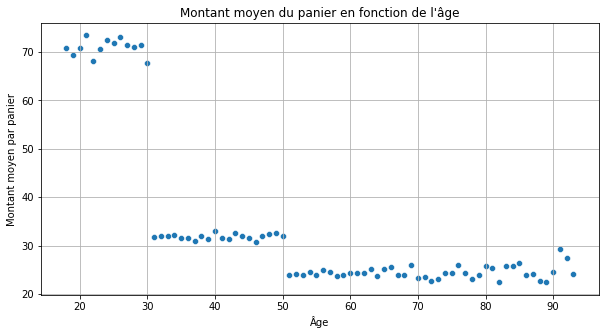

In [533]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = CA_session_age, x = 'Age' , y= "Montant du panier")
plt.title("Montant moyen du panier en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Montant moyen par panier")
plt.grid()
plt.show()

On observe trois groupes distincts en fonction des catégories d'âges.
Afin de pousser l'analyse, nous allons découper notre variables "Age" en quatre groupes :
* 18-30 ans
* 31-50 ans
* 51-70 ans
* 71-100 ans

Notre variable "Age" est maintenant qualitative.

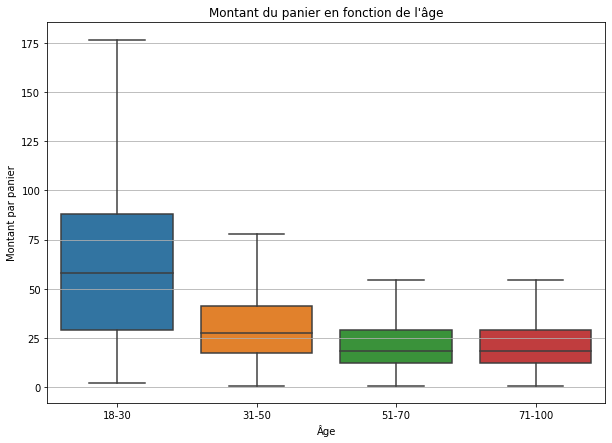

In [534]:
plt.figure(figsize = (10,7))
sns.boxplot(data = ctp_session, x = 'tranche_age', y ="Montant du panier",showfliers = False, order=["18-30", "31-50", "51-70","71-100"])
plt.title("Montant du panier en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Montant par panier")
plt.grid(axis = "y")
plt.show()

In [535]:
st.shapiro(ctp_session["Montant du panier"].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7117056846618652, pvalue=0.0)

Notre variable "Montant du panier" ne suit pas la loi normale.

Nous souhaitons vérifier la corrélation entre une variable qualitative et une variable quantitave. Comme notre variable "Montant du panier" ne suis pas la loi normale, nous utilisons un test non paramétrique.

Nous allons donc faire un test de Kruskall-Wallis

L’hypothèse nulle (H0) : La médiane est la même pour tous les groupes de données ▶ Il n'y a pas de corrélation entre l'âge de nos clients et le montant du panier

L’hypothèse alternative : (H1) : La médiane n’est pas égale pour tous les groupes de données ▶ Il y a une corrélation entre l'âge de nos clients et le montant du panier

In [536]:
res = st.kruskal(ctp_session["Montant du panier"].loc[ctp_session['tranche_age'] == "18-30"].dropna(),ctp_session["Montant du panier"].loc[ctp_session['tranche_age'] == "31-50"].dropna(), ctp_session["Montant du panier"].loc[ctp_session['tranche_age'] == "51-70"].dropna(), ctp_session["Montant du panier"].loc[ctp_session['tranche_age'] == "71-100"].dropna())
pd.DataFrame(res).round(6).rename(index={0:'Valeur du test',1:'P-Value'}, columns= {0: 'Kruskal-Wallis'})

,Kruskal-Wallis
Valeur du test,50742.783453
P-Value,0.000000


**La p-value est inférieure à notre seuil de 0.05, nous rejetons donc l'hypothèse nulle ▶ Il existe une corrélation entre l'âge des clients et le montant du panier**

## 5. Le lien entre l’âge des clients et les catégories des livres achetés

Test de corrélation variables qualitative et quantitative : ANOVA ou Kruskal Wallis

In [537]:
st.shapiro(ctp['Age'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9712284803390503, pvalue=0.0)

La variable Age ne suit pas la noi normale, il faut donc utiliser un test non paramétrique, donc ici le test de Kruskal Wallis

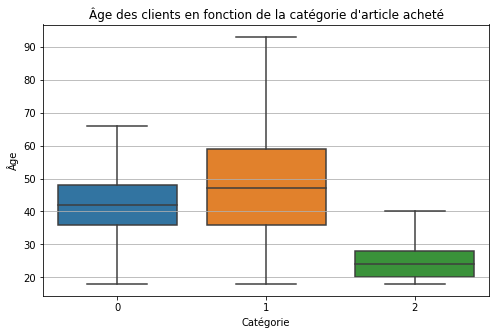

In [538]:
plt.figure(figsize = (8,5))
sns.boxplot(data = ctp, x = 'categ', y ='Age',showfliers = False)#, hue = 'categ'
plt.title("Âge des clients en fonction de la catégorie d'article acheté")
plt.xlabel("Catégorie")
plt.ylabel("Âge")
plt.xticks(ticks = [0,1,2], labels = ["0","1","2"])
plt.grid(axis = "y")
plt.show()


L’hypothèse nulle (H0) : La médiane est la même pour tous les groupes de données ▶ Il n'y a pas de corrélation entre l'âge de nos clients et la catégorie de produit acheté

L’hypothèse alternative : (H1) : La médiane n’est pas égale pour tous les groupes de données ▶ Il y a une corrélation entre l'âge de nos clients et la catégorie de produit acheté

In [539]:
res = st.kruskal(ctp['Age'].loc[ctp['categ'] == 0].dropna(), ctp['Age'].loc[ctp['categ'] == 1].dropna(), ctp['Age'].loc[ctp['categ'] == 2].dropna())
pd.DataFrame(res).round(6).rename(index={0:'Valeur du test',1:'P-Value'}, columns= {0: 'Kruskal-Wallis'})

,Kruskal-Wallis
Valeur du test,72209.482898
P-Value,0.000000


**La p-value est inférieure à notre seuil de 0.05, nous rejetons donc l'hypothèse nulle ▶ Il existe une corrélation entre l'âge des clients et la catégorie de produits qu'ils achètent.**